1. ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

<ipython-input-1-ce592ebbd13c>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


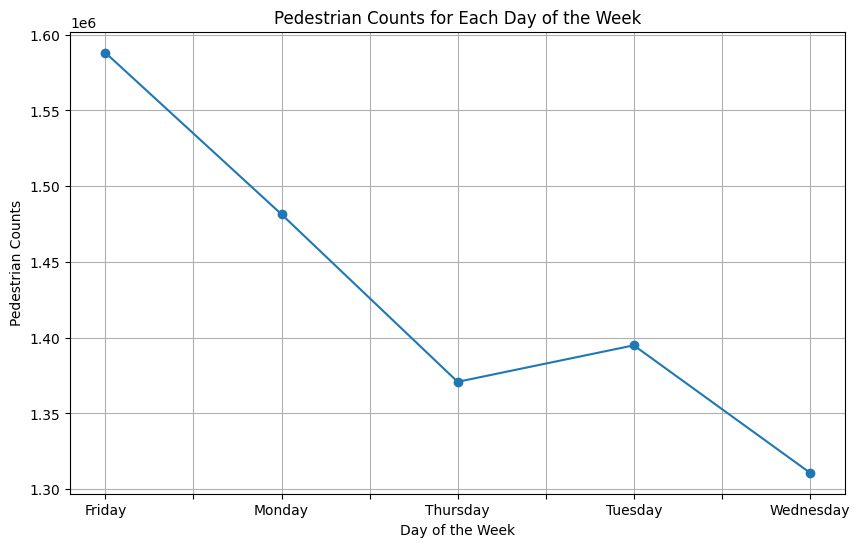

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

weekdays = df[(df['hour_beginning'].dt.dayofweek >= 0) & (df['hour_beginning'].dt.dayofweek <= 4)]  #Check documentation

# Aggregate pedestrian counts for each day of the week
ped_counts_per_day = weekdays.groupby(weekdays['hour_beginning'].dt.day_name())['Pedestrians'].sum()

# Plotting
plt.figure(figsize=(10, 6))
ped_counts_per_day.plot(kind='line', marker='o')
plt.title('Pedestrian Counts for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrian Counts')
plt.grid(True)
plt.show()

2. ⁠Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

    -This question requires you to show the relationship between a numerical feature(Pedestrians) and a non-numerical feature(Weather Summary). In such instances we use Encoding. Each weather condition can be encoded as numbers( 0,1,2..). This technique is called One-hot encoding.

    -Correlation matrices may not always be the most suitable visualization method for relationships involving categorical data points, nonetheless this was given as a question to help you understand the concept better.

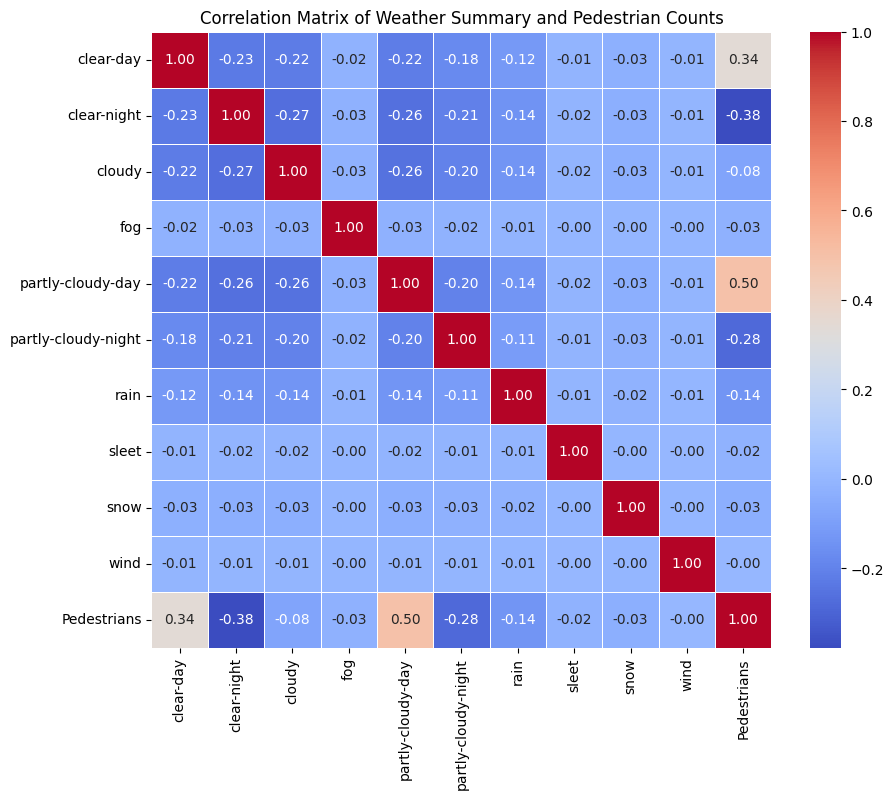

In [2]:
import seaborn as sns


brooklyn_bridge_2019 = df[(df['location'] == 'Brooklyn Bridge') & (df['hour_beginning'].dt.year == 2019)]

weather_summary_encoded = pd.get_dummies(brooklyn_bridge_2019['weather_summary'])

encoded_data = pd.concat([weather_summary_encoded, brooklyn_bridge_2019['Pedestrians']], axis=1)

# Correlation matrix
correlation_matrix = encoded_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Weather Summary and Pedestrian Counts')
plt.show()


3. ⁠Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

In [3]:
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)

ped_counts_per_time_of_day = df.groupby('time_of_day')['Pedestrians'].sum()

print("Pedestrian Activity Patterns Throughout the Day:")
print(ped_counts_per_time_of_day)

Pedestrian Activity Patterns Throughout the Day:
time_of_day
Afternoon    6803093
Evening      1710794
Morning      2466776
Night          52203
Name: Pedestrians, dtype: int64


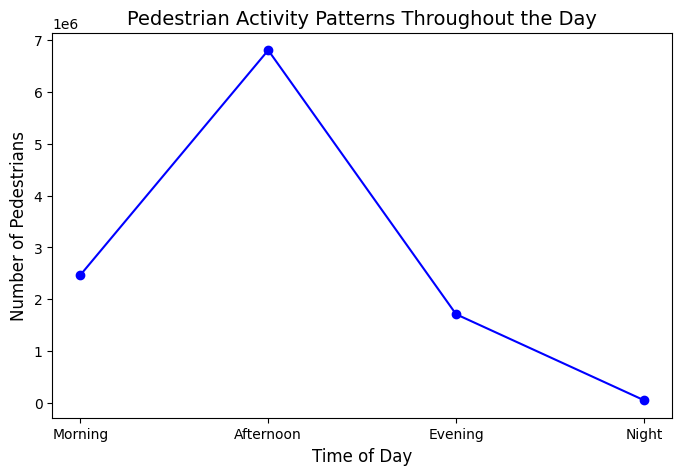

In [7]:
import matplotlib.pyplot as plt

time_of_day_order = ['Morning', 'Afternoon', 'Evening', 'Night']

plt.figure(figsize=(8, 5))
plt.plot(ped_counts_per_time_of_day.index, ped_counts_per_time_of_day.values, marker='o', linestyle='-', color='blue')

plt.title('Pedestrian Activity Patterns Throughout the Day', fontsize=14)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Pedestrians', fontsize=12)

plt.show()
